# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home diretcory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [37]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*/*"))
dog_files = np.array(glob("dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


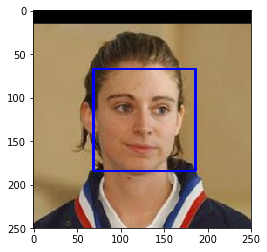

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# print(img.shape)

# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
###########################################################
# Average iteration time on CPU is 3.24 iterations / sec  #
###########################################################
###########################################################
# Average iteration time on GPU is 3.13 iterations / sec  #
###########################################################

from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
for i in tqdm(range(100)):
    face_detector(human_files_short[i])
    face_detector(dog_files_short[i])

100%|██████████| 100/100 [00:23<00:00,  3.21it/s]


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
"""
I'll come back to this if this project doesn't eat up too much time
"""

### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

"\nI'll come back to this if this project doesn't eat up too much time\n"

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [38]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [39]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ########### Think about splitting this into separate functions ####################
    # First convert our path file into an image, then to a tensor
    
    img = Image.open(img_path).convert('RGB')
    img_transforms = transforms.Compose([transforms.Resize(size=(244,244)),
                                     transforms.ToTensor()]) # <-- pretty much as shown in class
    # was hitting stride issues because of the alpha value int the image input tensor
    img = img_transforms(img)[:3,:,:].unsqueeze(0) # <- omit 4th dimension and group with unsqueeze(0)
    
    # The model loads cuda, but we need to convert he image tensor to cuda here as well
    if use_cuda:
        img = img.cuda()
    
    output = VGG16(img)
    
    return torch.argmax(output) # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    test = VGG16_predict(img_path)
    if int(test) > 151 and int(test < 268):
        return True
    else:
        return False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [9]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

# we'll use tqdm again because it's really cool!!!

# same list as our face detector
dog_files_short = dog_files[:100]

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
cnt = 0
for i in tqdm(range(100)):
    if dog_detector(dog_files_short[i]) == True:
        cnt += 1

result = cnt/100
print("Initial dog detector accuracy is {}%".format(result*100))

100%|██████████| 100/100 [00:32<00:00,  3.14it/s]

Initial dog detector accuracy is 92.0%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

# Resnet seems popoular

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [40]:
import os
from torchvision import datasets
# extra imports
import torchvision.transforms as transforms
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Thanks for this post:
# https://stackoverflow.com/questions/12984426/python-pil-ioerror-image-file-truncated-with-big-images

# A big thanks to this forum:
# https://discuss.pytorch.org/t/valueerror-expected-input-batch-size-324-to-match-target-batch-size-4/24498

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# much of this is from the introductory CNN lesson
# there will be some duplicated code here which I'll collapse into defined functions later

num_workers = 0 # one single CPU process
batch_size = 20 # since we'll collapsed images to 256 pixels below, this should survive iteration

# define urls for data
train_path = 'dog_images/train/'
valid_path = 'dog_images/valid/'
test_path = 'dog_images/test/'

# I'll try to add some of my own noise with rotations, flips, and re-size a little bigger than VGG-16.
transform_train = transforms.Compose([transforms.RandomRotation(45),
                                transforms.Resize(size=(256,256)),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))]) # from pytorch documentation

# don't do all this manipulation for normal tests and validations
transform_test = transforms.Compose([transforms.Resize(size=(256,256)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))]) # <-duplicate
                               
# define training, validation, and test datasets
train_data = datasets.ImageFolder(train_path, transform=transform_train)
valid_data = datasets.ImageFolder(valid_path, transform=transform_test) #since validation is a mini-test during training
test_data = datasets.ImageFolder(test_path, transform=transform_test)

# loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers,
                                          shuffle=False)

loaders_scratch = {
    'train': train_loader,
    'valid': valid_loader,
    'test' : test_loader
}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

- We'll see how this goes, but since there's so much nuance to look for, I'm experimenting with some pretty significant rotations and horizontal flips. I also set the size to 256 for some math that's closer to a base_2 numbering system during training (don't know if that has any significance)

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [41]:
import torch.nn as nn
import torch.nn.functional as F
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Thanks for this post:
# https://stackoverflow.com/questions/12984426/python-pil-ioerror-image-file-truncated-with-big-images

num_dog_breeds = 133 # the output of our final FC layer

# Concept: I'll take this net pretty wide in the Z-dimension, leave the fc layer pretty shallow,
# and experiment with a higher than normal drop-out rate. Let's see how it goes.
# I'll avoid a larger stride on the convolutional layers since these are pretty nuanced breed differences

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        # we'll go 4 layers deep sticking to powers of 2
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1) #  256x256x3 Tensor
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1) # 128x128x16 Tensor
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1) # 64x64x32 Tensor
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1) # 32x32x64 Tensor
        
        # set max-pooling for significant feature detection
        self.pool = nn.MaxPool2d(2,2)
        
        # flatten into input vector for fully connected layers
        # receives a 128x16x16
        self.fc1 = nn.Linear(128*64*4, 512) # total of 1024 pixels since it's a 256x256 image
        self.fc2 = nn.Linear(512, num_dog_breeds)
        
        self.dropout = nn.Dropout(0.2)        
        
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        
        # collapse into our fully connected input vector
        x = x.view(-1, 128*64*4)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

print(model_scratch)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=32768, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=133, bias=True)
  (dropout): Dropout(p=0.2)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
I'm going to test it first and then come back here

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [42]:
import torch.optim as optim

# since it worked well in the lessons, I'll stick to CrossEntropyLoss and SGD as my respective loss and optimizer
# I'll try to initially stick to a pretty low learning rate

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
# lr=0.01 momentum=0.9
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.02)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [43]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf # this is only updated inside the loop
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']): #set this to train_loader
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            
            optimizer.zero_grad()            # flush out the last error correction
            output = model(data)     # feed forward the batch into the network
            loss = criterion(output, target) # calculate overall error
            loss.backward()                  # back propogate
            optimizer.step()                 # adjust weights
            
            ## record the average training loss, using something like
            # The example looks pretty good, so I'll roll with it
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # Print the output for training feedback:
            # for each 20 batches, print the loss
            if batch_idx % 1 == 0:
                print("Epoch {} \tBatch {} \tTrain Loss {:.6f} ".format(
                    int(epoch), 
                    int(batch_idx/20), 
                    train_loss
                    ))
            
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']): #set this to valid_loader
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            # feed forward and calculate loss, no messing with gradients since it's just validation
            output = model(data)
            loss = criterion(output, target)
            
            ## update the average validation loss
            # I'll convert from the example above
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            int(epoch), 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased: {:.6f} ---> {:.6f}. Saving ...'.format(
                valid_loss_min, valid_loss))
            # two parameters for saving are the model-state-dictionary and provided file path for saving
            torch.save(model.state_dict(), save_path)
            # set the min loss for our next iteration
            valid_loss_min = valid_loss
            
    # return trained model
    return model

In [ ]:
# extra code so I don't accidentally overwrite the trained model
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

In [17]:
# train the model - see comments for overall testing results
model_scratch = train(1, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# algorithm testing:

#first test run:  1 epoch   lr: 0.03 | dropout: 0.4  -terrible results
#second test run: 1 epoch   lr: 0.05 | dropout: 0.2  -terrible results
#third test run:  1 epoch   lr: 0.01 | dropout: 0.2 | momentum: 0.9 - promising enough for 10 epochs (4.69 loss, 2% accuracy)
#fourth test run: 10 epochs lr: 0.01 | dropout: 0.2 | momentum: 0.9 - (took 50 min) Test Loss: 3.869447, 9%...so close!!
#fifth run:       10 epochs lr: 0.04 | dropout: 0.2 | no momentum this time (ran while at church) 18% accurate
#sixth run:       20+ epochs lr: 0.02| dropout: 0.2 | no momentum. (ran while shopping...) (was definitely overfitting)
#seventh run:     1 epoch   lr: 0.02 | dropout: 0.2 | running for a prettier output

Epoch 1 	Batch 0 	Train Loss 2.574741 
Epoch 1 	Batch 5 	Train Loss 1.881492 
Epoch 1 	Batch 10 	Train Loss 1.907611 
Epoch 1 	Batch 15 	Train Loss 1.943922 
Epoch: 1 	Training Loss: 1.941068 	Validation Loss: 3.575276
Validation loss decreased: inf ---> 3.575276. Saving ...


In [44]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [45]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']): # set this to test_loader
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.502460


Test Accuracy: 24% (207/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [46]:
## TODO: Specify data loaders

# I'll do the Resnet 152
# I'll need to use a 224x224 sized image, and just about everything else can stay the same
# I'll keep the rotations and horizontal flips for the training transformation


# I'll try to add some of my own noise with rotations, flips, and re-size a little bigger than VGG-16.
transform_train = transforms.Compose([transforms.RandomRotation(45),
                                transforms.Resize(size=(224,224)),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))]) # from pytorch documentation

# don't do all this manipulation for normal tests and validations
transform_test = transforms.Compose([transforms.Resize(size=(224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))]) 
                               
# re-define training, validation, and test datasets
train_data = datasets.ImageFolder(train_path, transform=transform_train)
valid_data = datasets.ImageFolder(valid_path, transform=transform_test) #since validation is a mini-test during training
test_data = datasets.ImageFolder(test_path, transform=transform_test)

# re-define loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers,
                                          shuffle=False)

loaders_transfer = {
    'train': train_loader,
    'valid': valid_loader,
    'test' : test_loader
}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [47]:
import torchvision.models as models
import torch.nn as nn

num_dog_breeds = 133 # the output of our final FC layer

## TODO: Specify model architecture 
model_transfer = models.resnet152(pretrained=True)

if use_cuda:
    model_transfer = model_transfer.cuda()

for param in transfered_model.parameters():
    param.requires_grad = False

# here is resnet152's final fc layer from the printing of the object:
# (fc): Linear(in_features=2048, out_features=1000, bias=True)
# we'll overwrite this so it goes from 2048 to our 133 specified breeds of dog
model_transfer.fc = nn.Linear(2048, num_dog_breeds, bias=True)

# We do need to train the final Linear layer, so unfreezing those parameters is needed
fc_weights = model_transfer.fc.parameters()

for param in model_transfer.fc.parameters():
    param.requires_grad = True

model_transfer #final print to ensure this model matches our requirements

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

Overall: I still think that most of this nuance can be determined at the feature dimensions of a convolutional network. My model above peaked at about 25% but could probably improve with some added depth. Along that line of reasoning, I'd like to take a pre-trained and particuarly deep model for evaluating the more nuanced traits of dog breeds.

Model Loading: Jupyter NB ended up taking 10GBytes of memory on my laptop

FC layer addition:

Low learning rate

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [48]:
# we'll stick with CrossEntropyLoss since this is a problem of categorization
criterion_transfer = nn.CrossEntropyLoss()
# we'll stick with SGD since this is going to take a LOT of processing
# we'll keep the learning rate small since this is a very deep network
optimizer_transfer = optim.SGD(transfered_model.fc.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [49]:
# train the model
# I think I can use the exact same function defined above
model_transfer = train(1, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, 
                       use_cuda, 'model_transfer.pt')

Epoch 1 	Batch 0 	Train Loss 4.900548 
Epoch 1 	Batch 0 	Train Loss 4.920688 
Epoch 1 	Batch 0 	Train Loss 4.945051 
Epoch 1 	Batch 0 	Train Loss 4.940346 
Epoch 1 	Batch 0 	Train Loss 4.934510 
Epoch 1 	Batch 0 	Train Loss 4.927973 
Epoch 1 	Batch 0 	Train Loss 4.939493 
Epoch 1 	Batch 0 	Train Loss 4.932533 
Epoch 1 	Batch 0 	Train Loss 4.921412 
Epoch 1 	Batch 0 	Train Loss 4.932132 
Epoch 1 	Batch 0 	Train Loss 4.926333 
Epoch 1 	Batch 0 	Train Loss 4.927207 
Epoch 1 	Batch 0 	Train Loss 4.935916 
Epoch 1 	Batch 0 	Train Loss 4.947814 
Epoch 1 	Batch 0 	Train Loss 4.950714 


KeyboardInterrupt: 

In [ ]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [ ]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [ ]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    return None

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [ ]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

In [ ]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)